In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df_customers=pd.read_csv('Desktop/OpenClassRoom/Базы_данных/e_commerce/olist_customers_dataset.csv')
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [32]:
df_pay=pd.read_csv('Desktop/OpenClassRoom/Базы_данных/e_commerce/olist_order_payments_dataset.csv')
df_pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [56]:
df_orders=pd.read_csv('Desktop/OpenClassRoom/Базы_данных/e_commerce/olist_orders_dataset.csv')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [302]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


In [303]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

In [304]:
df1=df_orders[~(df_orders['order_status']=='canceled')]

In [305]:
df1=df1.dropna(axis=0, how='all', subset=['order_delivered_customer_date'])

In [306]:
df1=df1[['order_id', 'customer_id', 'order_purchase_timestamp']]

In [307]:
df1.head()

,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39


In [308]:
df_pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [309]:
df2=df_pay[['order_id', 'payment_value']]

In [310]:
df1=df1.merge(df2, how='left', on='order_id')
df1.head()

,order_id,customer_id,order_purchase_timestamp,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,179.12


In [311]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [312]:
df3=df_customers[['customer_id', 'customer_unique_id']]

In [313]:
df1=df1.merge(df3, how='left', on='customer_id')

In [314]:
df1.head()

,order_id,customer_id,order_purchase_timestamp,payment_value,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,18.12,7c396fd4830fd04220f754e42b4e5bff
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2.00,7c396fd4830fd04220f754e42b4e5bff
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,18.59,7c396fd4830fd04220f754e42b4e5bff
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,141.46,af07308b275d755c9edb36a90c618231
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,179.12,3a653a41f6f9fc3d2a113cf8398680e8


In [315]:
df1=df1.drop('customer_id', axis=1)

In [316]:
df1=df1[['customer_unique_id', 'order_id','order_purchase_timestamp', 'payment_value']]

In [317]:
df1.head()

,customer_unique_id,order_id,order_purchase_timestamp,payment_value
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.12
1,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2.00
2,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.59
3,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,141.46
4,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,179.12


In [318]:
def make_rfm_data(df1,days):
    grouped = df1.groupby(['customer_unique_id'])
    rfm_data= grouped.agg({'payment_value': 'sum',
                           'order_id': 'count',
                           'order_purchase_timestamp': 'max'})

    rfm_data.rename(columns={'order_purchase_timestamp': "R",
                             'order_id': 'F',
                             'payment_value': 'M'}, inplace=True)

    last_date = rfm_data['R'].max() + pd.to_timedelta(days, 'D')  #### 1 день добавляем
    rfm_data['R'] = last_date - rfm_data['R']
    rfm_data['R'] = rfm_data['R'].dt.days
    
    rfm_data = rfm_data.reset_index()
    rfm_data = rfm_data[['customer_unique_id', 'R', 'F', 'M']]

    return rfm_data.set_index('customer_unique_id')

## Prediction with "oldish" datas, without fitting models!

J'aimerais voir comment le modèle de segmentation change si nous changeons la variable "Recency".

In [417]:
df1.head()

,customer_unique_id,order_id,order_purchase_timestamp,payment_value
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.12
1,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2.00
2,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.59
3,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,141.46
4,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,179.12


In [418]:
rfm_data_2 = make_rfm_data(df1,30)
rfm_data_2.head()

,R,F,M
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,141,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,144,1,27.19
0000f46a3911fa3c0805444483337064,566,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,350,1,43.62
0004aac84e0df4da2b147fca70cf8255,317,1,196.89


In [419]:
rfm_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93350 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       93350 non-null  int64  
 1   F       93350 non-null  int64  
 2   M       93350 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.8+ MB


## R, F, M groups

J'ai utilisé des quantiles pour attribuer des scores de récence et monétaire:
+ les groupes sont 0-33, 33-66, 66-100 quantiles

Pour Frequency j'ai décidé de les regrouper à la main:
+ score=1 si la valeur de fréquence est 1
+ 1 < score < 7 si la valeur de fréquence est 2
+ sinon, le score sera de 3


In [420]:
rfm_data_2.R.describe()

count    93350.000000
mean       266.950070
std        152.589932
min         30.000000
25%        143.000000
50%        248.000000
75%        375.000000
max        743.000000
Name: R, dtype: float64

In [421]:
rfm_data_2.M.describe()

count    93350.000000
mean       165.196388
std        226.322448
min          0.000000
25%         63.050000
50%        107.780000
75%        182.547500
max      13664.080000
Name: M, dtype: float64

In [422]:
# Récence: 1 - l'achat a été effectué il y a peu de temps, 3 - l'achat a été effectué il y a longtemps
# Monétaire: 1 - petit montant d'achat, 3 - gros montant d'achat

rfm_data_2['R_group'] = pd.cut(rfm_data_2['R'], [0, 149, 290, 744], labels = [1, 2, 3]).astype(str)
rfm_data_2['F_group'] = rfm_data_2['F'].apply(lambda x : '1' if x == 1 else '2' if 1<x<7 else '3')  # 3
rfm_data_2['M_group'] = pd.cut(rfm_data_2['M'], [-0.1, 75.17, 151.77, 13665], labels = [1, 2, 3]).astype(str)
rfm_data_2.head()

,R,F,M,R_group,F_group,M_group
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,141,1,141.90,1,1,2
0000b849f77a49e4a4ce2b2a4ca5be3f,144,1,27.19,1,1,1
0000f46a3911fa3c0805444483337064,566,1,86.22,3,1,2
0000f6ccb0745a6a4b88665a16c9f078,350,1,43.62,3,1,1
0004aac84e0df4da2b147fca70cf8255,317,1,196.89,3,1,3


###  Première segmentation : séquence de chiffres de Score

In [423]:
rfm_data_2['RFM_group_total'] =rfm_data_2['R_group'] + rfm_data_2['F_group'] + rfm_data_2['M_group']

In [424]:
rfm_data_2

,R,F,M,R_group,F_group,M_group,RFM_group_total
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,141,1,141.90,1,1,2,112
0000b849f77a49e4a4ce2b2a4ca5be3f,144,1,27.19,1,1,1,111
0000f46a3911fa3c0805444483337064,566,1,86.22,3,1,2,312
0000f6ccb0745a6a4b88665a16c9f078,350,1,43.62,3,1,1,311
0004aac84e0df4da2b147fca70cf8255,317,1,196.89,3,1,3,313
...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,476,1,2067.42,3,1,3,313
fffea47cd6d3cc0a88bd621562a9d061,291,1,84.58,3,1,2,312
ffff371b4d645b6ecea244b27531430a,597,1,112.46,3,1,2,312


In [425]:
def segment(x):
    if x == ['123', '133']:
        return 'Main'
    elif x in ['311', '312', '313']:
        return 'Gone'
    elif x in ['111', '112', '113']:
        return 'Nouveau'
    elif x in ["233", "133", "223", "123", "323", "333", "213"]:
        return 'Baleines'
    elif x in ['221', '222', '321', '322', '231', '232', '331', '332']:
        return 'Fidélité'
    else:
        return 'Regulier'

In [426]:
rfm_data_2['segments'] = rfm_data_2["RFM_group_total"].apply(segment)

In [427]:
segmentwise_2= rfm_data_2.groupby('segments').agg(RecencyMean = ('R', 'mean'),
                                          FrequencyMean = ('F', 'mean'),
                                          MonetaryMean = ('M', 'mean'),
                                          GroupSize = ('R', 'size'))
segmentwise_2

,RecencyMean,FrequencyMean,MonetaryMean,GroupSize
segments,,,,
Baleines,224.930285,1.315306,332.555888,11963
Fidélité,343.320802,2.426065,86.712657,1995
Gone,418.892309,1.000000,161.414335,36456
Nouveau,90.125927,1.000000,163.595777,23474
Regulier,213.609547,1.040181,79.383245,19462


In [428]:
segmentwise

,RecencyMean,FrequencyMean,MonetaryMean,GroupSize
segments,,,,
Baleines,221.479455,1.307517,329.158052,12266
Fidélité,330.689825,2.417396,86.346734,1828
Gone,418.821430,1.000000,162.660576,29081
Nouveau,76.314516,1.000000,164.419097,29547
Regulier,216.058755,1.050223,79.375852,20628


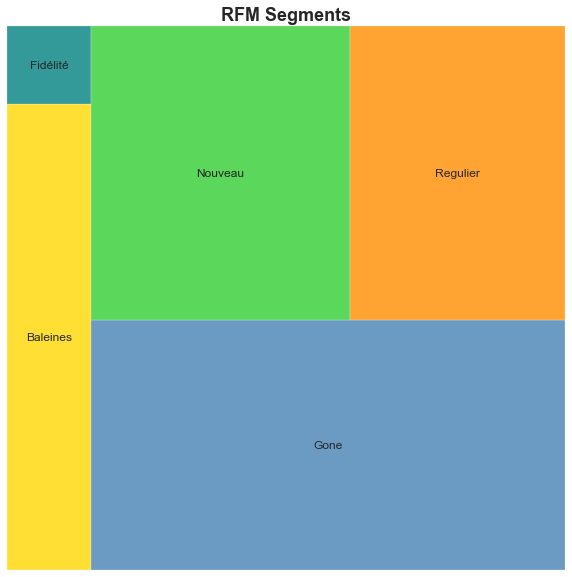

In [429]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(10, 10)
squarify.plot(sizes = segmentwise_2['GroupSize'], 
              label = segmentwise_2.index,
              color = ['gold', 'teal', 'steelblue', 'limegreen', 'darkorange', 'coral'],
              alpha = 0.8)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

Après avoir changé la variable "R", nous avons eu des changements dans le modèle de segmentation ci-dessus. La classe "Gone" a augmenté et la classe "Nouveau" a diminué.

### Clustering customers

In [430]:
rfm_data_2.head()

,R,F,M,R_group,F_group,M_group,RFM_group_total,segments
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,141,1,141.90,1,1,2,112,Nouveau
0000b849f77a49e4a4ce2b2a4ca5be3f,144,1,27.19,1,1,1,111,Nouveau
0000f46a3911fa3c0805444483337064,566,1,86.22,3,1,2,312,Gone
0000f6ccb0745a6a4b88665a16c9f078,350,1,43.62,3,1,1,311,Gone
0004aac84e0df4da2b147fca70cf8255,317,1,196.89,3,1,3,313,Gone


In [431]:
rfm_data_cluster_2=rfm_data_2[['R', 'F', 'M']]

In [432]:
rfm_data_scaled_2 = mms.transform(rfm_data_cluster_2)
rfm_data_scaled_2= pd.DataFrame(rfm_data_scaled_2, columns=['R', 'F', 'M'], index=rfm_data_cluster_2.index)    
rfm_data_scaled_2.head()

,R,F,M
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.196353,0.0,0.010385
0000b849f77a49e4a4ce2b2a4ca5be3f,0.200561,0.0,0.001990
0000f46a3911fa3c0805444483337064,0.792426,0.0,0.006310
0000f6ccb0745a6a4b88665a16c9f078,0.489481,0.0,0.003192
0004aac84e0df4da2b147fca70cf8255,0.443198,0.0,0.014409


In [433]:
clusters_30D=km.predict(rfm_data_scaled_2)       #clusters = km.fit_predict(rfm_data_cluster_mmsc)

rfm_data_2['cluster'] = clusters_30D
rfm_data_2.head()

,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,141,1,141.90,1,1,2,112,Nouveau,0
0000b849f77a49e4a4ce2b2a4ca5be3f,144,1,27.19,1,1,1,111,Nouveau,0
0000f46a3911fa3c0805444483337064,566,1,86.22,3,1,2,312,Gone,1
0000f6ccb0745a6a4b88665a16c9f078,350,1,43.62,3,1,1,311,Gone,2
0004aac84e0df4da2b147fca70cf8255,317,1,196.89,3,1,3,313,Gone,2


In [434]:
rfm_data_2['cluster'].unique()

array([0, 1, 2, 3])

In [435]:
rfm_data_2['cluster'].value_counts().sort_index()

0    28087
1    20173
2    26094
3    18996
Name: cluster, dtype: int64

In [436]:
rfm_data_2=rfm_data_2.reset_index()

In [437]:
segment_cluster_2=pd.DataFrame(rfm_data_2.groupby(['cluster', 'segments'], as_index=False)
                            ['customer_unique_id'].count())
segment_cluster_2=segment_cluster_2.rename({'customer_unique_id': 'count'}, axis=1)
segment_cluster_2

,cluster,segments,count
0,0,Baleines,7786
1,0,Fidélité,581
2,0,Nouveau,5582
3,0,Regulier,14138
4,1,Baleines,525
5,1,Fidélité,666
6,1,Gone,18982
7,2,Baleines,3015
8,2,Fidélité,748
9,2,Gone,17474


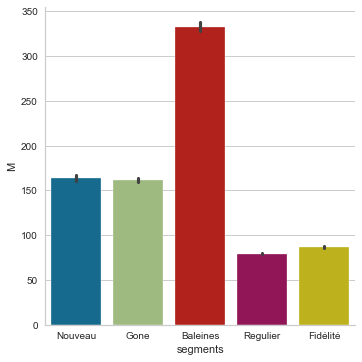

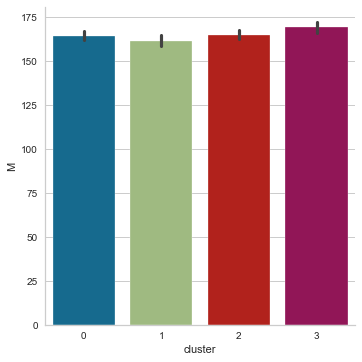

In [438]:
sns.catplot(x="segments", y="M",  kind="bar",data=rfm_data_2)
sns.catplot(x="cluster", y="M",  kind="bar",data=rfm_data_2)

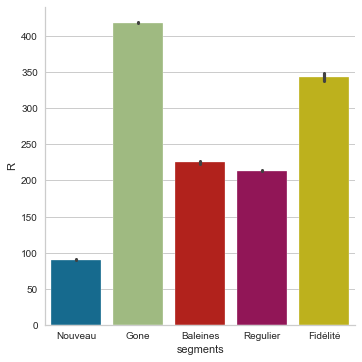

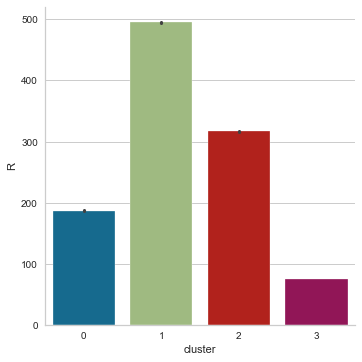

In [439]:
sns.catplot(x="segments", y="R",  kind="bar",data=rfm_data_2)
sns.catplot(x="cluster", y="R",  kind="bar",data=rfm_data_2)

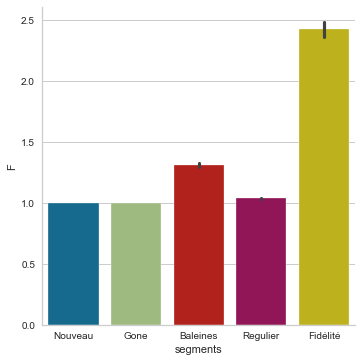

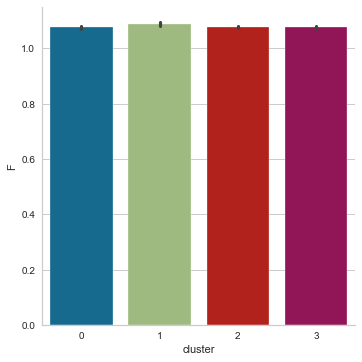

In [440]:
sns.catplot(x="segments", y="F",  kind="bar",data=rfm_data_2)
sns.catplot(x="cluster", y="F",  kind="bar",data=rfm_data_2)

Lors du changement de la variable "R", nous voyons un changement clair. La taille de chaque classe a changé. La composition de chaque classe a également changé.

Les graphiques nous aident à deviner que:
 
  + 0 - 'Baleines', 'Regulier'
  + 1 - 'Gone'
  + 2 - 'Nouveau'
  + 3 - 'Fidélité', 'Baleines', 'Regulier'.

In [441]:
df_stat_cluster_2 = rfm_data_2.pivot_table(index = 'cluster', values=['R', 'F', 'M'], aggfunc=['mean', 'std'])
df_stat_cluster_2

mean                               std                       
                F           M           R         F           M          R
cluster                                                                   
0        1.076263  164.718213  186.670809  0.397808  211.370863  35.866792
1        1.087989  161.870117  495.030685  0.584638  234.003402  65.512729
2        1.077412  165.256967  316.598490  0.417750  225.636862  41.568949
3        1.076964  169.352561   75.236418  0.393115  239.890915  25.941205

###  Classification des clients selon le score RFM

In [442]:
rfm_data_2['R'].describe()

count    93350.000000
mean       266.950070
std        152.589932
min         30.000000
25%        143.000000
50%        248.000000
75%        375.000000
max        743.000000
Name: R, dtype: float64

In [443]:
rfm_data_2['M'].describe()

count    93350.000000
mean       165.196388
std        226.322448
min          0.000000
25%         63.050000
50%        107.780000
75%        182.547500
max      13664.080000
Name: M, dtype: float64

In [444]:
# Récence : 1 - l'achat a été effectué il y a longtemps
# Monetary: 1 - petit montant d'achat, 5 - gros montant d'achate
rfm_data_2['R_score'] = pd.cut(rfm_data_2['R'], [0, 92, 177, 268, 382, 744], labels = [5, 4, 3, 2, 1])\
                      .astype(str)

rfm_data_2['F_score'] = rfm_data_2['F'].apply(lambda x : '1' if x == 1 else '2' if 1<x<7 else '3')  ##### 2

rfm_data_2['M_score'] = pd.cut(rfm_data_2['M'], [-0.1, 55.26, 87.36, 132.69, 208.55, 13665], labels = [1, 2, 3, 4, 5])\
                      .astype(str)
rfm_data_2.head()

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score
0,0000366f3b9a7992bf8c76cfdf3221e2,141,1,141.90,1,1,2,112,Nouveau,0,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,144,1,27.19,1,1,1,111,Nouveau,0,4,1,1
2,0000f46a3911fa3c0805444483337064,566,1,86.22,3,1,2,312,Gone,1,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,350,1,43.62,3,1,1,311,Gone,2,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,317,1,196.89,3,1,3,313,Gone,2,2,1,4


In [445]:
rfm_data_2.loc[rfm_data_2.cluster==1]

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score
2,0000f46a3911fa3c0805444483337064,566,1,86.22,3,1,2,312,Gone,1,1,1,2
8,0005e1862207bf6ccc02e4228effd9a0,572,1,150.12,3,1,2,312,Gone,1,1,1,4
10,0006fdc98a402fceb4eb0ee528f6a8d4,437,1,29.00,3,1,1,311,Gone,1,1,1,1
14,000a5ad9c4601d2bbdd9ed765d5213b3,413,1,91.28,3,1,2,312,Gone,1,1,1,3
18,000de6019bb59f34c099a907c151d855,406,1,257.44,3,1,3,313,Gone,1,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93331,ffef0ffa736c7b3d9af741611089729b,486,1,139.07,3,1,2,312,Gone,1,1,1,4
93336,fff3a9369e4b7102fab406a334a678c3,413,1,102.74,3,1,2,312,Gone,1,1,1,3
93345,fffcf5a5ff07b0908bd4e2dbc735a684,476,1,2067.42,3,1,3,313,Gone,1,1,1,5
93347,ffff371b4d645b6ecea244b27531430a,597,1,112.46,3,1,2,312,Gone,1,1,1,3


+ Il convient de remplacer que nos poids ont changé.

In [446]:
print('W_R', W_R), print('W_F', W_F), print('W_M', W_M)

W_R 0.21110132722792052
W_F 0.38520964380970596
W_M 0.4036890289623734


(None, None, None)

In [447]:
rfm_data_2['RFM_score_total'] = (rfm_data_2['R_score'].astype('int64') * W_R / 5 * 100 \
                        + rfm_data_2['F_score'].astype('int64') * W_F / 2 * 100 \
                        + rfm_data_2['M_score'].astype('int64') * W_M / 5 * 100)

rfm_data_2.head()

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score,RFM_score_total
0,0000366f3b9a7992bf8c76cfdf3221e2,141,1,141.90,1,1,2,112,Nouveau,0,4,1,4,68.443711
1,0000b849f77a49e4a4ce2b2a4ca5be3f,144,1,27.19,1,1,1,111,Nouveau,0,4,1,1,44.222369
2,0000f46a3911fa3c0805444483337064,566,1,86.22,3,1,2,312,Gone,1,1,1,2,39.630070
3,0000f6ccb0745a6a4b88665a16c9f078,350,1,43.62,3,1,1,311,Gone,2,2,1,1,35.778316
4,0004aac84e0df4da2b147fca70cf8255,317,1,196.89,3,1,3,313,Gone,2,2,1,4,59.999658


In [448]:
rfm_data.head()

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score,RFM_score_total,class
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1,1,2,112,Nouveau,3,4,1,4,68.443711,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1,1,1,111,Nouveau,3,4,1,1,44.222369,5
2,0000f46a3911fa3c0805444483337064,537,1,86.22,3,1,2,312,Gone,1,1,1,2,39.630070,5
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,1,1,311,Gone,2,2,1,1,35.778316,5
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,3,213,Baleines,2,2,1,4,59.999658,3


In [449]:
rfm_data_2.RFM_score_total.describe()

count    93350.000000
mean        56.383163
std         14.082797
min         31.556289
25%         44.222369
50%         56.147904
75%         64.591957
max        119.260482
Name: RFM_score_total, dtype: float64

In [450]:
rfm_data.RFM_score_total.describe()

count    93350.000000
mean        57.303868
std         14.185426
min         31.556289
25%         47.703850
50%         56.518176
75%         68.073438
max        119.260482
Name: RFM_score_total, dtype: float64

In [451]:
rfm_data_2.pivot_table(index = 'RFM_score_total', values=['R', 'F', 'M'], aggfunc=['mean', 'count'])

mean                         count            
                        F           M           R     F     M     R
RFM_score_total                                                    
31.556289        1.000000   39.738399  488.904632  4404  4404  4404
35.778316        1.000000   40.002067  320.757009  3638  3638  3638
39.630070        1.000000   70.967998  482.127991  4555  4555  4555
40.000342        1.000000   39.621534  223.594241  4133  4133  4133
43.852096        1.000000   70.487539  322.296673  3937  3937  3937
...                   ...         ...         ...   ...   ...   ...
106.594403       7.000000  292.530000  321.500000     2     2     2
106.964675       7.333333  156.753333  129.333333     3     3     3
110.816429       9.333333  753.845000  227.333333     6     6     6
115.038456       9.000000  727.434286  127.285714     7     7     7
119.260482       8.666667  447.873333   59.333333     6     6     6

[71 rows x 6 columns]

In [452]:
rfm_data['RFM_score_total'].quantile([0.2,0.4,0.6,0.8,1])

0.2     44.222369
0.4     52.296150
0.6     60.369930
0.8     68.443711
1.0    119.260482
Name: RFM_score_total, dtype: float64

In [453]:
rfm_data_2['class'] = pd.cut(rfm_data_2.RFM_score_total, [0, 44.222369, 52.296150, 60.369930, 68.443711, 120],
                                                           labels = [5, 4, 3, 2, 1]).astype(str)
rfm_data_2.head(10)

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score,RFM_score_total,class
0,0000366f3b9a7992bf8c76cfdf3221e2,141,1,141.90,1,1,2,112,Nouveau,0,4,1,4,68.443711,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,144,1,27.19,1,1,1,111,Nouveau,0,4,1,1,44.222369,5
2,0000f46a3911fa3c0805444483337064,566,1,86.22,3,1,2,312,Gone,1,1,1,2,39.630070,5
3,0000f6ccb0745a6a4b88665a16c9f078,350,1,43.62,3,1,1,311,Gone,2,2,1,1,35.778316,5
4,0004aac84e0df4da2b147fca70cf8255,317,1,196.89,3,1,3,313,Gone,2,2,1,4,59.999658,3
5,0004bd2a26a76fe21f786e4fbd80607f,175,1,166.98,2,1,3,213,Baleines,0,4,1,4,68.443711,2
6,00050ab1314c0e55a6ca13cf7181fecf,161,1,35.38,2,1,1,211,Regulier,0,4,1,1,44.222369,5
7,00053a61a98854899e70ed204dd4bafe,212,1,419.18,2,1,3,213,Baleines,0,3,1,5,72.295465,1
8,0005e1862207bf6ccc02e4228effd9a0,572,1,150.12,3,1,2,312,Gone,1,1,1,4,55.777631,3
9,0005ef4cd20d2893f0d9fbd94d3c0d97,199,1,129.76,2,1,2,212,Regulier,0,3,1,3,56.147904,3


In [454]:
rfm_data.loc[(rfm_data['class'] =='1')]

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score,RFM_score_total,class
7,00053a61a98854899e70ed204dd4bafe,183,1,419.18,2,1,3,213,Baleines,0,3,1,5,72.295465,1
19,000e309254ab1fc5ba99dd469d36bdb4,66,2,78.42,1,2,2,122,Regulier,3,5,2,2,75.778658,1
22,000fbf0473c10fc1ab6f8d2d286ce20c,35,1,362.38,1,1,3,113,Nouveau,3,5,1,5,80.739518,1
36,001928b561575b2821c92254a2327d06,5,1,164.81,1,1,3,113,Nouveau,3,5,1,4,72.665737,1
42,001a34eb30ecb8e3aacb07c475ca4dd1,49,1,161.71,1,1,3,113,Nouveau,3,5,1,4,72.665737,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93319,ffe96c782a5bc522bd8bad3bc638981a,31,1,245.22,1,1,3,113,Nouveau,3,5,1,5,80.739518,1
93321,ffe9e41fbd14db4a7361347c56af5447,200,1,220.88,2,1,3,213,Baleines,0,3,1,5,72.295465,1
93327,ffeddf8aa7cdecf403e77b2e9a99e2ea,108,2,204.20,1,2,3,123,Baleines,3,4,2,4,87.704193,1
93338,fff5eb4918b2bf4b2da476788d42051c,58,1,2844.96,1,1,3,113,Nouveau,3,5,1,5,80.739518,1


In [455]:
rfm_data_2.loc[(rfm_data_2['class'] =='1')]

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score,RFM_score_total,class
7,00053a61a98854899e70ed204dd4bafe,212,1,419.18,2,1,3,213,Baleines,0,3,1,5,72.295465,1
19,000e309254ab1fc5ba99dd469d36bdb4,95,2,78.42,1,2,2,122,Regulier,3,4,2,2,71.556632,1
22,000fbf0473c10fc1ab6f8d2d286ce20c,64,1,362.38,1,1,3,113,Nouveau,3,5,1,5,80.739518,1
36,001928b561575b2821c92254a2327d06,34,1,164.81,1,1,3,113,Nouveau,3,5,1,4,72.665737,1
42,001a34eb30ecb8e3aacb07c475ca4dd1,78,1,161.71,1,1,3,113,Nouveau,3,5,1,4,72.665737,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93312,ffe6efca3c7e6a06bad0a6a883280a93,247,1,226.90,2,1,3,213,Baleines,0,3,1,5,72.295465,1
93319,ffe96c782a5bc522bd8bad3bc638981a,60,1,245.22,1,1,3,113,Nouveau,3,5,1,5,80.739518,1
93321,ffe9e41fbd14db4a7361347c56af5447,229,1,220.88,2,1,3,213,Baleines,0,3,1,5,72.295465,1
93327,ffeddf8aa7cdecf403e77b2e9a99e2ea,137,2,204.20,1,2,3,123,Baleines,0,4,2,4,87.704193,1


In [456]:
rfm_data.loc[(rfm_data['class'] =='5')]

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score,RFM_score_total,class
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1,1,1,111,Nouveau,3,4,1,1,44.222369,5
2,0000f46a3911fa3c0805444483337064,537,1,86.22,3,1,2,312,Gone,1,1,1,2,39.630070,5
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,1,1,311,Gone,2,2,1,1,35.778316,5
6,00050ab1314c0e55a6ca13cf7181fecf,132,1,35.38,1,1,1,111,Nouveau,0,4,1,1,44.222369,5
10,0006fdc98a402fceb4eb0ee528f6a8d4,408,1,29.00,3,1,1,311,Gone,1,1,1,1,31.556289,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93330,ffeefd086fc667aaf6595c8fe3d22d54,337,1,62.94,3,1,1,311,Gone,2,2,1,2,43.852096,5
93332,fff1afc79f6b5db1e235a4a6c30ceda7,364,1,50.09,3,1,1,311,Gone,2,2,1,1,35.778316,5
93339,fff699c184bcc967d62fa2c6171765f7,362,1,55.00,3,1,1,311,Gone,2,2,1,1,35.778316,5
93342,fffa431dd3fcdefea4b1777d114144f2,303,1,81.20,3,1,2,312,Gone,2,2,1,2,43.852096,5


In [457]:
rfm_data_2.loc[(rfm_data['class'] =='5')]

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score,RFM_score_total,class
1,0000b849f77a49e4a4ce2b2a4ca5be3f,144,1,27.19,1,1,1,111,Nouveau,0,4,1,1,44.222369,5
2,0000f46a3911fa3c0805444483337064,566,1,86.22,3,1,2,312,Gone,1,1,1,2,39.630070,5
3,0000f6ccb0745a6a4b88665a16c9f078,350,1,43.62,3,1,1,311,Gone,2,2,1,1,35.778316,5
6,00050ab1314c0e55a6ca13cf7181fecf,161,1,35.38,2,1,1,211,Regulier,0,4,1,1,44.222369,5
10,0006fdc98a402fceb4eb0ee528f6a8d4,437,1,29.00,3,1,1,311,Gone,1,1,1,1,31.556289,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93330,ffeefd086fc667aaf6595c8fe3d22d54,366,1,62.94,3,1,1,311,Gone,2,2,1,2,43.852096,5
93332,fff1afc79f6b5db1e235a4a6c30ceda7,393,1,50.09,3,1,1,311,Gone,2,1,1,1,31.556289,5
93339,fff699c184bcc967d62fa2c6171765f7,391,1,55.00,3,1,1,311,Gone,2,1,1,1,31.556289,5
93342,fffa431dd3fcdefea4b1777d114144f2,332,1,81.20,3,1,2,312,Gone,2,2,1,2,43.852096,5


In [458]:
# https://aiaspirant.com/optimal-k-in-k-menas/

In [459]:
rfm_data_3 = make_rfm_data(df1,15)
rfm_data_3.head()

,R,F,M
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,126,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,129,1,27.19
0000f46a3911fa3c0805444483337064,551,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,335,1,43.62
0004aac84e0df4da2b147fca70cf8255,302,1,196.89


### R, F, M groups

In [460]:
rfm_data_3.R.describe()

count    93350.000000
mean       251.950070
std        152.589932
min         15.000000
25%        128.000000
50%        233.000000
75%        360.000000
max        728.000000
Name: R, dtype: float64

In [461]:
rfm_data_3.M.describe()

count    93350.000000
mean       165.196388
std        226.322448
min          0.000000
25%         63.050000
50%        107.780000
75%        182.547500
max      13664.080000
Name: M, dtype: float64

In [462]:
# Récence: 1 - l'achat a été effectué il y a peu de temps, 3 - l'achat a été effectué il y a longtemps
# Monétaire: 1 - petit montant d'achat, 3 - gros montant d'achat

rfm_data_3['R_group'] = pd.cut(rfm_data_3['R'], [0, 149, 290, 728], labels = [1, 2, 3]).astype(str)
rfm_data_3['F_group'] = rfm_data_3['F'].apply(lambda x : '1' if x == 1 else '2' if 1<x<7 else '3')  # 3
rfm_data_3['M_group'] = pd.cut(rfm_data_3['M'], [-0.1, 75.17, 151.77, 13665], labels = [1, 2, 3]).astype(str)
rfm_data_3.head()

,R,F,M,R_group,F_group,M_group
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,126,1,141.90,1,1,2
0000b849f77a49e4a4ce2b2a4ca5be3f,129,1,27.19,1,1,1
0000f46a3911fa3c0805444483337064,551,1,86.22,3,1,2
0000f6ccb0745a6a4b88665a16c9f078,335,1,43.62,3,1,1
0004aac84e0df4da2b147fca70cf8255,302,1,196.89,3,1,3


####  Première segmentation : séquence de chiffres de Score

In [463]:
rfm_data_3['RFM_group_total'] =rfm_data_3['R_group'] + rfm_data_3['F_group'] + rfm_data_3['M_group']

In [464]:
rfm_data_3.head()

,R,F,M,R_group,F_group,M_group,RFM_group_total
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,126,1,141.90,1,1,2,112
0000b849f77a49e4a4ce2b2a4ca5be3f,129,1,27.19,1,1,1,111
0000f46a3911fa3c0805444483337064,551,1,86.22,3,1,2,312
0000f6ccb0745a6a4b88665a16c9f078,335,1,43.62,3,1,1,311
0004aac84e0df4da2b147fca70cf8255,302,1,196.89,3,1,3,313


In [465]:
rfm_data_3['segments'] = rfm_data_3["RFM_group_total"].apply(segment)

In [466]:
segmentwise_3= rfm_data_3.groupby('segments').agg(RecencyMean = ('R', 'mean'),
                                          FrequencyMean = ('F', 'mean'),
                                          MonetaryMean = ('M', 'mean'),
                                          GroupSize = ('R', 'size'))
segmentwise_3

,RecencyMean,FrequencyMean,MonetaryMean,GroupSize
segments,,,,
Baleines,223.270178,1.312899,329.653747,12055
Fidélité,336.780922,2.414570,86.473354,1908
Gone,417.402472,1.000000,162.495508,32765
Nouveau,83.263946,1.000000,163.859096,26710
Regulier,215.210275,1.046605,79.413117,19912


In [467]:
segmentwise

,RecencyMean,FrequencyMean,MonetaryMean,GroupSize
segments,,,,
Baleines,221.479455,1.307517,329.158052,12266
Fidélité,330.689825,2.417396,86.346734,1828
Gone,418.821430,1.000000,162.660576,29081
Nouveau,76.314516,1.000000,164.419097,29547
Regulier,216.058755,1.050223,79.375852,20628


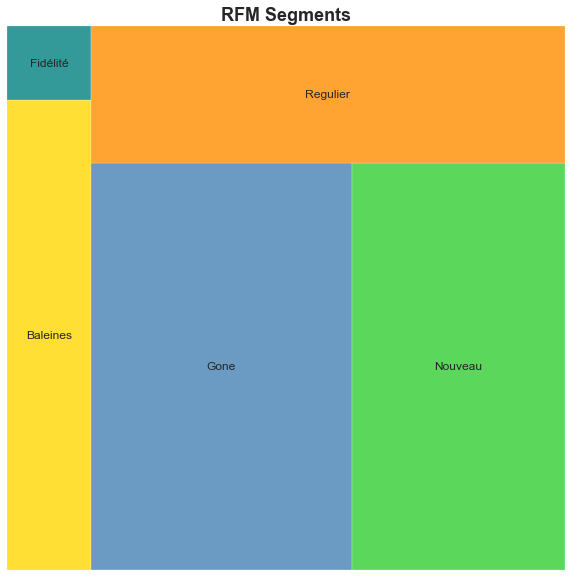

In [468]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(10, 10)
squarify.plot(sizes = segmentwise_3['GroupSize'], 
              label = segmentwise_3.index,
              color = ['gold', 'teal', 'steelblue', 'limegreen', 'darkorange', 'coral'],
              alpha = 0.8)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

#### Clustering customers

In [469]:
rfm_data_3

,R,F,M,R_group,F_group,M_group,RFM_group_total,segments
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,126,1,141.90,1,1,2,112,Nouveau
0000b849f77a49e4a4ce2b2a4ca5be3f,129,1,27.19,1,1,1,111,Nouveau
0000f46a3911fa3c0805444483337064,551,1,86.22,3,1,2,312,Gone
0000f6ccb0745a6a4b88665a16c9f078,335,1,43.62,3,1,1,311,Gone
0004aac84e0df4da2b147fca70cf8255,302,1,196.89,3,1,3,313,Gone
...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,461,1,2067.42,3,1,3,313,Gone
fffea47cd6d3cc0a88bd621562a9d061,276,1,84.58,2,1,2,212,Regulier
ffff371b4d645b6ecea244b27531430a,582,1,112.46,3,1,2,312,Gone


In [470]:
rfm_data_cluster_3=rfm_data_3[['R', 'F', 'M']]

In [471]:
rfm_data_scaled_3 = mms.transform(rfm_data_cluster_3)
rfm_data_scaled_3= pd.DataFrame(rfm_data_scaled_3, columns=['R', 'F', 'M'], index=rfm_data_cluster_3.index)    
rfm_data_scaled_3.head()

,R,F,M
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.175316,0.0,0.010385
0000b849f77a49e4a4ce2b2a4ca5be3f,0.179523,0.0,0.001990
0000f46a3911fa3c0805444483337064,0.771388,0.0,0.006310
0000f6ccb0745a6a4b88665a16c9f078,0.468443,0.0,0.003192
0004aac84e0df4da2b147fca70cf8255,0.422160,0.0,0.014409


In [472]:
clusters_15D=km.predict(rfm_data_scaled_3)       #clusters = km.fit_predict(rfm_data_cluster_mmsc)

rfm_data_3['cluster'] = clusters_15D
rfm_data_3.head()

,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,126,1,141.90,1,1,2,112,Nouveau,0
0000b849f77a49e4a4ce2b2a4ca5be3f,129,1,27.19,1,1,1,111,Nouveau,0
0000f46a3911fa3c0805444483337064,551,1,86.22,3,1,2,312,Gone,1
0000f6ccb0745a6a4b88665a16c9f078,335,1,43.62,3,1,1,311,Gone,2
0004aac84e0df4da2b147fca70cf8255,302,1,196.89,3,1,3,313,Gone,2


In [473]:
rfm_data_3['cluster'].unique()

array([0, 1, 2, 3])

In [474]:
rfm_data['cluster'].value_counts().sort_index()

0    27070
1    16495
2    24297
3    25488
Name: cluster, dtype: int64

In [475]:
rfm_data_2['cluster'].value_counts().sort_index()

0    28087
1    20173
2    26094
3    18996
Name: cluster, dtype: int64

In [476]:
rfm_data_3['cluster'].value_counts().sort_index()

0    28676
1    18256
2    24480
3    21938
Name: cluster, dtype: int64

In [477]:
df_stat_cluster_3 = rfm_data_3.pivot_table(index = 'cluster', values=['R', 'F', 'M'], aggfunc=['mean', 'std'])
df_stat_cluster_3

mean                               std                       
                F           M           R         F           M          R
cluster                                                                   
0        1.076092  163.282930  185.911982  0.401739  205.592925  36.980240
1        1.089395  162.592438  489.264680  0.605377  236.858193  61.995323
2        1.078064  165.438924  317.260866  0.417548  228.574194  41.556495
3        1.076306  169.593816   67.907968  0.384446  240.205312  31.061102

####  Classification des clients selon le score RFM

In [478]:
# Récence : 1 - l'achat a été effectué il y a longtemps
# Monetary: 1 - petit montant d'achat, 5 - gros montant d'achat

rfm_data_3['R_score'] = pd.cut(rfm_data_3['R'], [0, 92, 177, 268, 382, 744], labels = [5, 4, 3, 2, 1])\
                      .astype(str)

rfm_data_3['F_score'] = rfm_data_3['F'].apply(lambda x : '1' if x == 1 else '2' if 1<x<7 else '3')  ##### 2

rfm_data_3['M_score'] = pd.cut(rfm_data_3['M'], [-0.1, 55.26, 87.36, 132.69, 208.55, 13665], labels = [1, 2, 3, 4, 5])\
                      .astype(str)
rfm_data_3.head()

,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score
customer_unique_id,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,126,1,141.90,1,1,2,112,Nouveau,0,4,1,4
0000b849f77a49e4a4ce2b2a4ca5be3f,129,1,27.19,1,1,1,111,Nouveau,0,4,1,1
0000f46a3911fa3c0805444483337064,551,1,86.22,3,1,2,312,Gone,1,1,1,2
0000f6ccb0745a6a4b88665a16c9f078,335,1,43.62,3,1,1,311,Gone,2,2,1,1
0004aac84e0df4da2b147fca70cf8255,302,1,196.89,3,1,3,313,Gone,2,2,1,4


In [479]:
#cv_r_0 = df_stat_cluster_3[('std', 'R')][0] / df_stat_cluster_3[('mean', 'R')][0]
#cv_r_1 = df_stat_cluster_3[('std', 'R')][1] / df_stat_cluster_3[('mean', 'R')][1]
#cv_r_2 = df_stat_cluster_3[('std', 'R')][2] / df_stat_cluster_3[('mean', 'R')][2]
#cv_r_3 = df_stat_cluster_3[('std', 'R')][3] / df_stat_cluster_3[('mean', 'R')][3]
# cv_r_4 = df_stat_cluster[('std', 'R')][4] / df_stat_cluster[('mean', 'R')][4]

#w_R = np.min([cv_r_0, cv_r_1, cv_r_2, cv_r_3]) / np.sum([cv_r_0, cv_r_1, cv_r_2, cv_r_3])
#w_R

In [480]:
#cv_f_0 = df_stat_cluster_3[('std', 'F')][0] / df_stat_cluster_3[('mean', 'F')][0]
#cv_f_1 = df_stat_cluster_3[('std', 'F')][1] / df_stat_cluster_3[('mean', 'F')][1]
#cv_f_2 = df_stat_cluster_3[('std', 'F')][2] / df_stat_cluster_3[('mean', 'F')][2]
#cv_f_3 = df_stat_cluster_3[('std', 'F')][3] / df_stat_cluster_3[('mean', 'F')][3]
# cv_r_4 = df_stat_cluster[('std', 'F')][4] / df_stat_cluster[('mean', 'F')][4]


#w_F = np.min([cv_f_0, cv_f_1, cv_f_2, cv_f_3]) / np.sum([cv_f_0, cv_f_1, cv_f_2, cv_f_3])
#w_F


# Возможно потому что у меня значения абберонт, например, если я их уберу

In [481]:
#cv_m_0 = df_stat_cluster_3[('std', 'M')][0] / df_stat_cluster_3[('mean', 'M')][0]
#cv_m_1 = df_stat_cluster_3[('std', 'M')][1] / df_stat_cluster_3[('mean', 'M')][1]
#cv_m_2 = df_stat_cluster_3[('std', 'M')][2] / df_stat_cluster_3[('mean', 'M')][2]
#cv_m_3 = df_stat_cluster_3[('std', 'M')][3] / df_stat_cluster_3[('mean', 'M')][3]
# cv_r_4 = df_stat_cluster[('std', 'M')][4] / df_stat_cluster[('mean', 'M')][4]


#w_M = np.min([cv_m_0, cv_m_1, cv_m_2, cv_m_3]) / np.sum([cv_m_0, cv_m_1, cv_m_2, cv_m_3])
#w_M

In [482]:
#W_R = w_R / (w_R + w_F + w_M)
#W_F = w_F / (w_R + w_F + w_M)
#W_M = w_M / (w_R + w_F + w_M)

print(f'Weight of Recency  : {W_R}')
print(f'Weight of Frequency: {W_F}')
print(f'Weight of Monetary : {W_M}')
print(f'Total sum of weight: {np.sum([W_R, W_F, W_M])}')

Weight of Recency  : 0.21110132722792052
Weight of Frequency: 0.38520964380970596
Weight of Monetary : 0.4036890289623734
Total sum of weight: 0.9999999999999998


In [483]:
rfm_data_3['RFM_score_total'] = (rfm_data_3['R_score'].astype('int64') * W_R / 5 * 100 \
                        + rfm_data_3['F_score'].astype('int64') * W_F / 2 * 100 \
                        + rfm_data_3['M_score'].astype('int64') * W_M / 5 * 100)

rfm_data_3.head()

,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score,RFM_score_total
customer_unique_id,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,126,1,141.90,1,1,2,112,Nouveau,0,4,1,4,68.443711
0000b849f77a49e4a4ce2b2a4ca5be3f,129,1,27.19,1,1,1,111,Nouveau,0,4,1,1,44.222369
0000f46a3911fa3c0805444483337064,551,1,86.22,3,1,2,312,Gone,1,1,1,2,39.630070
0000f6ccb0745a6a4b88665a16c9f078,335,1,43.62,3,1,1,311,Gone,2,2,1,1,35.778316
0004aac84e0df4da2b147fca70cf8255,302,1,196.89,3,1,3,313,Gone,2,2,1,4,59.999658


In [484]:
rfm_data.RFM_score_total.describe()

count    93350.000000
mean        57.303868
std         14.185426
min         31.556289
25%         47.703850
50%         56.518176
75%         68.073438
max        119.260482
Name: RFM_score_total, dtype: float64

In [485]:
rfm_data_3.RFM_score_total.describe()

count    93350.000000
mean        56.836528
std         14.145408
min         31.556289
25%         47.703850
50%         56.147904
75%         68.073438
max        119.260482
Name: RFM_score_total, dtype: float64

In [486]:
rfm_data_3.pivot_table(index = 'RFM_score_total', values=['R', 'F', 'M'], aggfunc=['mean', 'count'])

mean                         count            
                        F           M           R     F     M     R
RFM_score_total                                                    
31.556289        1.000000   39.698454  481.351648  4095  4095  4095
35.778316        1.000000   40.058961  316.142101  3589  3589  3589
39.630070        1.000000   70.978230  476.039730  4153  4153  4153
40.000342        1.000000   39.664663  219.800311  3856  3856  3856
43.852096        1.000000   70.533376  318.344654  3975  3975  3975
...                   ...         ...         ...   ...   ...   ...
106.594403       7.000000  292.530000  306.500000     2     2     2
106.964675       7.333333  156.753333  114.333333     3     3     3
110.816429       9.800000  699.472000  220.800000     5     5     5
115.038456       8.000000  801.503333  131.500000     6     6     6
119.260482       9.250000  499.496250   54.125000     8     8     8

[71 rows x 6 columns]

In [487]:
rfm_data_3['class'] = pd.cut(rfm_data_3.RFM_score_total, [0, 44.222369, 52.296150, 60.369930, 68.443711, 120],
                                                           labels = [5, 4, 3, 2, 1]).astype(str)
rfm_data_3.head(10)

,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score,RFM_score_total,class
customer_unique_id,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,126,1,141.90,1,1,2,112,Nouveau,0,4,1,4,68.443711,2
0000b849f77a49e4a4ce2b2a4ca5be3f,129,1,27.19,1,1,1,111,Nouveau,0,4,1,1,44.222369,5
0000f46a3911fa3c0805444483337064,551,1,86.22,3,1,2,312,Gone,1,1,1,2,39.630070,5
0000f6ccb0745a6a4b88665a16c9f078,335,1,43.62,3,1,1,311,Gone,2,2,1,1,35.778316,5
0004aac84e0df4da2b147fca70cf8255,302,1,196.89,3,1,3,313,Gone,2,2,1,4,59.999658,3
0004bd2a26a76fe21f786e4fbd80607f,160,1,166.98,2,1,3,213,Baleines,0,4,1,4,68.443711,2
00050ab1314c0e55a6ca13cf7181fecf,146,1,35.38,1,1,1,111,Nouveau,0,4,1,1,44.222369,5
00053a61a98854899e70ed204dd4bafe,197,1,419.18,2,1,3,213,Baleines,0,3,1,5,72.295465,1
0005e1862207bf6ccc02e4228effd9a0,557,1,150.12,3,1,2,312,Gone,1,1,1,4,55.777631,3


In [488]:
rfm_data.loc[(rfm_data['class'] =='1')]

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score,RFM_score_total,class
7,00053a61a98854899e70ed204dd4bafe,183,1,419.18,2,1,3,213,Baleines,0,3,1,5,72.295465,1
19,000e309254ab1fc5ba99dd469d36bdb4,66,2,78.42,1,2,2,122,Regulier,3,5,2,2,75.778658,1
22,000fbf0473c10fc1ab6f8d2d286ce20c,35,1,362.38,1,1,3,113,Nouveau,3,5,1,5,80.739518,1
36,001928b561575b2821c92254a2327d06,5,1,164.81,1,1,3,113,Nouveau,3,5,1,4,72.665737,1
42,001a34eb30ecb8e3aacb07c475ca4dd1,49,1,161.71,1,1,3,113,Nouveau,3,5,1,4,72.665737,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93319,ffe96c782a5bc522bd8bad3bc638981a,31,1,245.22,1,1,3,113,Nouveau,3,5,1,5,80.739518,1
93321,ffe9e41fbd14db4a7361347c56af5447,200,1,220.88,2,1,3,213,Baleines,0,3,1,5,72.295465,1
93327,ffeddf8aa7cdecf403e77b2e9a99e2ea,108,2,204.20,1,2,3,123,Baleines,3,4,2,4,87.704193,1
93338,fff5eb4918b2bf4b2da476788d42051c,58,1,2844.96,1,1,3,113,Nouveau,3,5,1,5,80.739518,1


In [489]:
rfm_data_3.loc[(rfm_data_3['class'] =='1')]

,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score,RFM_score_total,class
customer_unique_id,,,,,,,,,,,,,,
00053a61a98854899e70ed204dd4bafe,197,1,419.18,2,1,3,213,Baleines,0,3,1,5,72.295465,1
000e309254ab1fc5ba99dd469d36bdb4,80,2,78.42,1,2,2,122,Regulier,3,5,2,2,75.778658,1
000fbf0473c10fc1ab6f8d2d286ce20c,49,1,362.38,1,1,3,113,Nouveau,3,5,1,5,80.739518,1
001928b561575b2821c92254a2327d06,19,1,164.81,1,1,3,113,Nouveau,3,5,1,4,72.665737,1
001a34eb30ecb8e3aacb07c475ca4dd1,63,1,161.71,1,1,3,113,Nouveau,3,5,1,4,72.665737,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffe96c782a5bc522bd8bad3bc638981a,45,1,245.22,1,1,3,113,Nouveau,3,5,1,5,80.739518,1
ffe9e41fbd14db4a7361347c56af5447,214,1,220.88,2,1,3,213,Baleines,0,3,1,5,72.295465,1
ffeddf8aa7cdecf403e77b2e9a99e2ea,122,2,204.20,1,2,3,123,Baleines,3,4,2,4,87.704193,1


In [490]:
rfm_data.loc[(rfm_data['class'] =='5')]

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score,RFM_score_total,class
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1,1,1,111,Nouveau,3,4,1,1,44.222369,5
2,0000f46a3911fa3c0805444483337064,537,1,86.22,3,1,2,312,Gone,1,1,1,2,39.630070,5
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,1,1,311,Gone,2,2,1,1,35.778316,5
6,00050ab1314c0e55a6ca13cf7181fecf,132,1,35.38,1,1,1,111,Nouveau,0,4,1,1,44.222369,5
10,0006fdc98a402fceb4eb0ee528f6a8d4,408,1,29.00,3,1,1,311,Gone,1,1,1,1,31.556289,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93330,ffeefd086fc667aaf6595c8fe3d22d54,337,1,62.94,3,1,1,311,Gone,2,2,1,2,43.852096,5
93332,fff1afc79f6b5db1e235a4a6c30ceda7,364,1,50.09,3,1,1,311,Gone,2,2,1,1,35.778316,5
93339,fff699c184bcc967d62fa2c6171765f7,362,1,55.00,3,1,1,311,Gone,2,2,1,1,35.778316,5
93342,fffa431dd3fcdefea4b1777d114144f2,303,1,81.20,3,1,2,312,Gone,2,2,1,2,43.852096,5


In [491]:
rfm_data_3.loc[(rfm_data_3['class'] =='5')]

,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score,RFM_score_total,class
customer_unique_id,,,,,,,,,,,,,,
0000b849f77a49e4a4ce2b2a4ca5be3f,129,1,27.19,1,1,1,111,Nouveau,0,4,1,1,44.222369,5
0000f46a3911fa3c0805444483337064,551,1,86.22,3,1,2,312,Gone,1,1,1,2,39.630070,5
0000f6ccb0745a6a4b88665a16c9f078,335,1,43.62,3,1,1,311,Gone,2,2,1,1,35.778316,5
00050ab1314c0e55a6ca13cf7181fecf,146,1,35.38,1,1,1,111,Nouveau,0,4,1,1,44.222369,5
0006fdc98a402fceb4eb0ee528f6a8d4,422,1,29.00,3,1,1,311,Gone,1,1,1,1,31.556289,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff699c184bcc967d62fa2c6171765f7,376,1,55.00,3,1,1,311,Gone,2,2,1,1,35.778316,5
fffa431dd3fcdefea4b1777d114144f2,317,1,81.20,3,1,2,312,Gone,2,2,1,2,43.852096,5
fffb09418989a0dbff854a28163e47c6,269,1,73.16,2,1,1,211,Regulier,2,2,1,2,43.852096,5


In [492]:
rfm_data_4 = make_rfm_data(df1,8)
rfm_data_4.head()

,R,F,M
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,119,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,122,1,27.19
0000f46a3911fa3c0805444483337064,544,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,328,1,43.62
0004aac84e0df4da2b147fca70cf8255,295,1,196.89


In [493]:
rfm_data_cluster_4=rfm_data_4

In [494]:
rfm_data_scaled_4 = mms.transform(rfm_data_cluster_4)
rfm_data_scaled_4= pd.DataFrame(rfm_data_scaled_4, columns=['R', 'F', 'M'], index=rfm_data_cluster_4.index)    
rfm_data_scaled_4.head()

,R,F,M
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.165498,0.0,0.010385
0000b849f77a49e4a4ce2b2a4ca5be3f,0.169705,0.0,0.001990
0000f46a3911fa3c0805444483337064,0.761571,0.0,0.006310
0000f6ccb0745a6a4b88665a16c9f078,0.458626,0.0,0.003192
0004aac84e0df4da2b147fca70cf8255,0.412342,0.0,0.014409


In [495]:
clusters_8D=km.predict(rfm_data_scaled_4)       #clusters = km.fit_predict(rfm_data_cluster_mmsc)

rfm_data_4['cluster'] = clusters_8D
rfm_data_4.head()

,R,F,M,cluster
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,119,1,141.90,3
0000b849f77a49e4a4ce2b2a4ca5be3f,122,1,27.19,3
0000f46a3911fa3c0805444483337064,544,1,86.22,1
0000f6ccb0745a6a4b88665a16c9f078,328,1,43.62,2
0004aac84e0df4da2b147fca70cf8255,295,1,196.89,2


In [496]:
rfm_data_4['cluster'].unique()

array([3, 1, 2, 0])

In [497]:
rfm_data['cluster'].value_counts().sort_index()

0    27070
1    16495
2    24297
3    25488
Name: cluster, dtype: int64

In [498]:
rfm_data_2['cluster'].value_counts().sort_index()

0    28087
1    20173
2    26094
3    18996
Name: cluster, dtype: int64

In [499]:
rfm_data_3['cluster'].value_counts().sort_index()

0    28676
1    18256
2    24480
3    21938
Name: cluster, dtype: int64

In [500]:
rfm_data_4['cluster'].value_counts().sort_index()

0    27859
1    17362
2    24277
3    23852
Name: cluster, dtype: int64

In [501]:
df_stat_cluster_4 = rfm_data_4.pivot_table(index = 'cluster', values=['R', 'F', 'M'], aggfunc=['mean', 'std'])
df_stat_cluster_4

mean                               std                       
                F           M           R         F           M          R
cluster                                                                   
0        1.076744  162.416612  185.573172  0.404845  202.339868  36.034955
1        1.088469  163.094658  486.707465  0.565002  240.008326  60.315987
2        1.079128  165.353134  316.352020  0.464819  228.713537  42.241576
3        1.075633  169.813473   65.651224  0.381732  239.685872  33.845514

####  Classification des clients selon le score RFM

In [502]:
# Récence : 1 - l'achat a été effectué il y a longtemps
# Monetary: 1 - petit montant d'achat, 5 - gros montant d'achat

rfm_data_4['R_score'] = pd.cut(rfm_data_4['R'], [0, 92, 177, 268, 382, 744], labels = [5, 4, 3, 2, 1])\
                      .astype(str)

# rfm_data['F_score'] = rfm_data['F'].apply(lambda x : '1' if x == 1 else '2')

rfm_data_4['F_score'] = rfm_data_4['F'].apply(lambda x : '1' if x == 1 else '2' if 1<x<7 else '3')  ##### 2

rfm_data_4['M_score'] = pd.cut(rfm_data_4['M'], [-0.1, 55.26, 87.36, 132.69, 208.55, 13665], labels = [1, 2, 3, 4, 5])\
                      .astype(str)
rfm_data_4.head()


,R,F,M,cluster,R_score,F_score,M_score
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,119,1,141.90,3,4,1,4
0000b849f77a49e4a4ce2b2a4ca5be3f,122,1,27.19,3,4,1,1
0000f46a3911fa3c0805444483337064,544,1,86.22,1,1,1,2
0000f6ccb0745a6a4b88665a16c9f078,328,1,43.62,2,2,1,1
0004aac84e0df4da2b147fca70cf8255,295,1,196.89,2,2,1,4


In [503]:
#cv_r_0 = df_stat_cluster_4[('std', 'R')][0] / df_stat_cluster_4[('mean', 'R')][0]
#cv_r_1 = df_stat_cluster_4[('std', 'R')][1] / df_stat_cluster_4[('mean', 'R')][1]
#cv_r_2 = df_stat_cluster_4[('std', 'R')][2] / df_stat_cluster_4[('mean', 'R')][2]
#cv_r_3 = df_stat_cluster_4[('std', 'R')][3] / df_stat_cluster_4[('mean', 'R')][3]
# cv_r_4 = df_stat_cluster[('std', 'R')][4] / df_stat_cluster[('mean', 'R')][4]

#w_R = np.min([cv_r_0, cv_r_1, cv_r_2, cv_r_3]) / np.sum([cv_r_0, cv_r_1, cv_r_2, cv_r_3])
#w_R

In [504]:
#cv_f_0 = df_stat_cluster_4[('std', 'F')][0] / df_stat_cluster_4[('mean', 'F')][0]
#cv_f_1 = df_stat_cluster_4[('std', 'F')][1] / df_stat_cluster_4[('mean', 'F')][1]
#cv_f_2 = df_stat_cluster_4[('std', 'F')][2] / df_stat_cluster_4[('mean', 'F')][2]
#cv_f_3 = df_stat_cluster_4[('std', 'F')][3] / df_stat_cluster_4[('mean', 'F')][3]
# cv_r_4 = df_stat_cluster[('std', 'F')][4] / df_stat_cluster[('mean', 'F')][4]


#w_F = np.min([cv_f_0, cv_f_1, cv_f_2, cv_f_3]) / np.sum([cv_f_0, cv_f_1, cv_f_2, cv_f_3])
#w_F


# Возможно потому что у меня значения абберонт, например, если я их уберу

In [505]:
#cv_m_0 = df_stat_cluster_4[('std', 'M')][0] / df_stat_cluster_4[('mean', 'M')][0]
#cv_m_1 = df_stat_cluster_4[('std', 'M')][1] / df_stat_cluster_4[('mean', 'M')][1]
#cv_m_2 = df_stat_cluster_4[('std', 'M')][2] / df_stat_cluster_4[('mean', 'M')][2]
#cv_m_3 = df_stat_cluster_4[('std', 'M')][3] / df_stat_cluster_4[('mean', 'M')][3]
# cv_r_4 = df_stat_cluster[('std', 'M')][4] / df_stat_cluster[('mean', 'M')][4]


#w_M = np.min([cv_m_0, cv_m_1, cv_m_2, cv_m_3]) / np.sum([cv_m_0, cv_m_1, cv_m_2, cv_m_3])
#w_M

In [506]:
#W_R = w_R / (w_R + w_F + w_M)
#W_F = w_F / (w_R + w_F + w_M)
#W_M = w_M / (w_R + w_F + w_M)

print(f'Weight of Recency  : {W_R}')
print(f'Weight of Frequency: {W_F}')
print(f'Weight of Monetary : {W_M}')
print(f'Total sum of weight: {np.sum([W_R, W_F, W_M])}')

Weight of Recency  : 0.21110132722792052
Weight of Frequency: 0.38520964380970596
Weight of Monetary : 0.4036890289623734
Total sum of weight: 0.9999999999999998


In [507]:
rfm_data_4['RFM_score_total'] = (rfm_data_4['R_score'].astype('int64') * W_R / 5 * 100 \
                        + rfm_data_4['F_score'].astype('int64') * W_F / 2 * 100 \
                        + rfm_data_4['M_score'].astype('int64') * W_M / 5 * 100)

rfm_data_4.head()

,R,F,M,cluster,R_score,F_score,M_score,RFM_score_total
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,119,1,141.90,3,4,1,4,68.443711
0000b849f77a49e4a4ce2b2a4ca5be3f,122,1,27.19,3,4,1,1,44.222369
0000f46a3911fa3c0805444483337064,544,1,86.22,1,1,1,2,39.630070
0000f6ccb0745a6a4b88665a16c9f078,328,1,43.62,2,2,1,1,35.778316
0004aac84e0df4da2b147fca70cf8255,295,1,196.89,2,2,1,4,59.999658


In [508]:
rfm_data_4['class'] = pd.cut(rfm_data_4.RFM_score_total, [0, 44.222369, 52.296150, 60.369930, 68.443711, 120],
                                                           labels = [5, 4, 3, 2, 1]).astype(str)
rfm_data_4.head(10)

,R,F,M,cluster,R_score,F_score,M_score,RFM_score_total,class
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,119,1,141.90,3,4,1,4,68.443711,2
0000b849f77a49e4a4ce2b2a4ca5be3f,122,1,27.19,3,4,1,1,44.222369,5
0000f46a3911fa3c0805444483337064,544,1,86.22,1,1,1,2,39.630070,5
0000f6ccb0745a6a4b88665a16c9f078,328,1,43.62,2,2,1,1,35.778316,5
0004aac84e0df4da2b147fca70cf8255,295,1,196.89,2,2,1,4,59.999658,3
0004bd2a26a76fe21f786e4fbd80607f,153,1,166.98,0,4,1,4,68.443711,2
00050ab1314c0e55a6ca13cf7181fecf,139,1,35.38,0,4,1,1,44.222369,5
00053a61a98854899e70ed204dd4bafe,190,1,419.18,0,3,1,5,72.295465,1
0005e1862207bf6ccc02e4228effd9a0,550,1,150.12,1,1,1,4,55.777631,3


In [509]:
rfm_data_5 = make_rfm_data(df1,4)
rfm_data_5.head()

,R,F,M
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19
0000f46a3911fa3c0805444483337064,540,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,324,1,43.62
0004aac84e0df4da2b147fca70cf8255,291,1,196.89


In [510]:
rfm_data_cluster_5=rfm_data_5

In [511]:
rfm_data_scaled_5 = mms.transform(rfm_data_cluster_5)
rfm_data_scaled_5= pd.DataFrame(rfm_data_scaled_5, columns=['R', 'F', 'M'], index=rfm_data_cluster_5.index)    
rfm_data_scaled_5.head()

,R,F,M
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.159888,0.0,0.010385
0000b849f77a49e4a4ce2b2a4ca5be3f,0.164095,0.0,0.001990
0000f46a3911fa3c0805444483337064,0.755961,0.0,0.006310
0000f6ccb0745a6a4b88665a16c9f078,0.453015,0.0,0.003192
0004aac84e0df4da2b147fca70cf8255,0.406732,0.0,0.014409


In [512]:
clusters_4D=km.predict(rfm_data_scaled_5)       #clusters = km.fit_predict(rfm_data_cluster_mmsc)

rfm_data_5['cluster'] = clusters_4D
rfm_data_5.head()

,R,F,M,cluster
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,3
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,3
0000f46a3911fa3c0805444483337064,540,1,86.22,1
0000f6ccb0745a6a4b88665a16c9f078,324,1,43.62,2
0004aac84e0df4da2b147fca70cf8255,291,1,196.89,2


In [513]:
rfm_data['cluster'].value_counts().sort_index()

0    27070
1    16495
2    24297
3    25488
Name: cluster, dtype: int64

In [514]:
rfm_data_5['cluster'].value_counts().sort_index()

0    27365
1    16845
2    24226
3    24914
Name: cluster, dtype: int64

In [515]:
rfm_data.loc[rfm_data.customer_unique_id=="0000366f3b9a7992bf8c76cfdf3221e2"]

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score,RFM_score_total,class
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.9,1,1,2,112,Nouveau,3,4,1,4,68.443711,2


In [516]:
rfm_data_2.loc[rfm_data_2.customer_unique_id=="0000366f3b9a7992bf8c76cfdf3221e2"]

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score,RFM_score_total,class
0,0000366f3b9a7992bf8c76cfdf3221e2,141,1,141.9,1,1,2,112,Nouveau,0,4,1,4,68.443711,2


In [517]:
rfm_data_3=rfm_data_3.reset_index()

In [518]:
rfm_data_3.loc[rfm_data_3.customer_unique_id=="0000366f3b9a7992bf8c76cfdf3221e2"]

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score,RFM_score_total,class
0,0000366f3b9a7992bf8c76cfdf3221e2,126,1,141.9,1,1,2,112,Nouveau,0,4,1,4,68.443711,2


In [519]:
rfm_data_4=rfm_data_4.reset_index()
rfm_data_4.loc[rfm_data_4.customer_unique_id=="0000366f3b9a7992bf8c76cfdf3221e2"]

,customer_unique_id,R,F,M,cluster,R_score,F_score,M_score,RFM_score_total,class
0,0000366f3b9a7992bf8c76cfdf3221e2,119,1,141.9,3,4,1,4,68.443711,2


In [520]:
rfm_data_5=rfm_data_5.reset_index()
rfm_data_5.loc[rfm_data_5.customer_unique_id=="0000366f3b9a7992bf8c76cfdf3221e2"]

,customer_unique_id,R,F,M,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.9,3


## Prediction from Day 1 to Day 90, with clustering performance evaluation

In [521]:
from sklearn.metrics.cluster import rand_score, v_measure_score

In [522]:
rand_score(clusters,clusters), rand_score(clusters_4D,clusters)

(1.0, 0.9866907476348339)

In [523]:
rand_score(clusters,clusters), rand_score(clusters_8D,clusters)

(1.0, 0.9636007767913332)

In [524]:
rand_score(clusters,clusters), rand_score(clusters_15D,clusters)

(1.0, 0.924613070716309)

In [525]:
rand_score(clusters,clusters), rand_score(clusters_30D,clusters)

(1.0, 0.8551447418013078)

In [526]:
rfm_data_dupl=rfm_data
rfm_data_dupl.head()

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score,RFM_score_total,class
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1,1,2,112,Nouveau,3,4,1,4,68.443711,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1,1,1,111,Nouveau,3,4,1,1,44.222369,5
2,0000f46a3911fa3c0805444483337064,537,1,86.22,3,1,2,312,Gone,1,1,1,2,39.630070,5
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,1,1,311,Gone,2,2,1,1,35.778316,5
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,3,213,Baleines,2,2,1,4,59.999658,3


In [527]:
for delay_in_days in range(1,91,5):
    data = make_rfm_data(df1,delay_in_days)
    transformed_data = mms.transform(data)
    data_transformed = pd.DataFrame(transformed_data, columns=['R', 'F', 'M'], index=data.index)    
    clusters_with_delay = km.predict(data_transformed)
    
    print(f"+{delay_in_days} days: RI = {rand_score(clusters_with_delay,clusters)}, v_measure_score = {v_measure_score(clusters_with_delay,clusters)}")

+1 days: RI = 1.0, v_measure_score = 1.0
+6 days: RI = 0.9748301563788505, v_measure_score = 0.9214662259235047
+11 days: RI = 0.9485377321955344, v_measure_score = 0.8631099930955245
+16 days: RI = 0.9199336617589607, v_measure_score = 0.8079184626466218
+21 days: RI = 0.889773333689919, v_measure_score = 0.756750545864212
+26 days: RI = 0.8676973563101253, v_measure_score = 0.7207250748457039
+31 days: RI = 0.8517517555956811, v_measure_score = 0.6956706267085392
+36 days: RI = 0.8354578501972283, v_measure_score = 0.671488237572945
+41 days: RI = 0.8195832417746528, v_measure_score = 0.6488462708844206
+46 days: RI = 0.805074641107425, v_measure_score = 0.6287927451158596
+51 days: RI = 0.7923521900062728, v_measure_score = 0.6110788017976895
+56 days: RI = 0.7815442765155712, v_measure_score = 0.5964586152420656
+61 days: RI = 0.7733094557130817, v_measure_score = 0.5853686561475203
+66 days: RI = 0.7675667421110003, v_measure_score = 0.5774656975148593
+71 days: RI = 0.76357830340

In [528]:
L2=[]
for delay_in_days in range(5,91):
    data = make_rfm_data(df1,delay_in_days)
    transformed_data = mms.transform(data)
    data_transformed = pd.DataFrame(transformed_data, columns=['R', 'F', 'M'], index=data.index)    
    clusters_with_delay = km.predict(data_transformed)    
    L2.append(rand_score(clusters_with_delay, clusters))

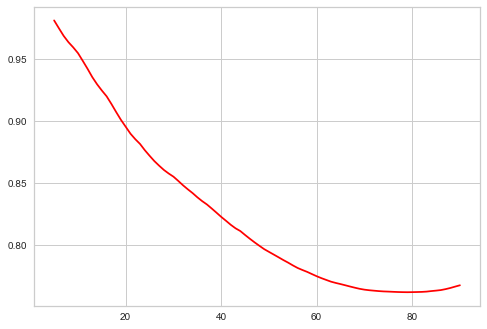

In [529]:
fig = plt.figure()
ax = fig.add_subplot(111)    
ax.plot(range(5,91),L2,c='red')
plt.show()

In [530]:
L2=[]
for delay_in_days in range(5,91):
    data = make_rfm_data(df1,delay_in_days)
    transformed_data = mms.transform(data)
    data_transformed = pd.DataFrame(transformed_data, columns=['R', 'F', 'M'], index=data.index)    
    clusters_with_delay = km.predict(data_transformed)    
    L2.append(v_measure_score(clusters_with_delay,clusters))

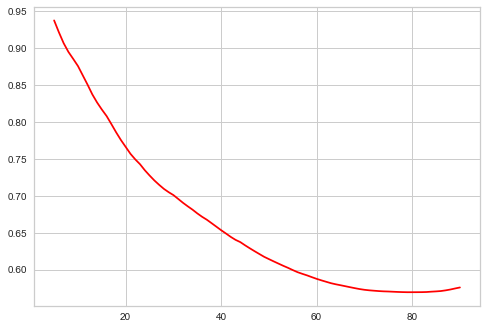

In [531]:
fig = plt.figure()
ax = fig.add_subplot(111)    
ax.plot(range(5,91),L2,c='red')
plt.show()

In [532]:
rfm_data.head()

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score,RFM_score_total,class
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1,1,2,112,Nouveau,3,4,1,4,68.443711,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1,1,1,111,Nouveau,3,4,1,1,44.222369,5
2,0000f46a3911fa3c0805444483337064,537,1,86.22,3,1,2,312,Gone,1,1,1,2,39.630070,5
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,1,1,311,Gone,2,2,1,1,35.778316,5
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,3,213,Baleines,2,2,1,4,59.999658,3


In [535]:
for delay_in_days in range(1,91,5):
    data = make_rfm_data(df1,delay_in_days)
    
    data['R_score'] = pd.cut(data['R'], [0, 92, 177, 268, 382, 1000], labels = [5, 4, 3, 2, 1])\
                      .astype(str)
    data['F_score'] = data['F'].apply(lambda x : '1' if x == 1 else '2' if 1<x<7 else '3')
    data['M_score'] = pd.cut(data['M'], [-0.1, 55.26, 87.36, 132.69, 208.55, 13665], labels = [1, 2, 3, 4, 5])\
                      .astype(str)
    
    data['RFM_score_total'] = (data['R_score'].astype('int64') * W_R / 5 * 100 \
                        + data['F_score'].astype('int64') * W_F / 2 * 100 \
                        + data['M_score'].astype('int64') * W_M / 5 * 100)
    
    data['class'] = pd.cut(data.RFM_score_total, [0, 44.222369, 52.296150, 60.369930, 68.443711, 120],
                                                           labels = [5, 4, 3, 2, 1]).astype(str)
    
    class_with_delay=data['class']
    
    print(f"+{delay_in_days} days: RI = {rand_score(class_with_delay, rfm_data['class'])}, v_measure_score = {v_measure_score(class_with_delay, rfm_data['class'])}")

+1 days: RI = 0.9729976327009108, v_measure_score = 0.93690254750508
+6 days: RI = 0.9635978665751127, v_measure_score = 0.8949555152248602
+11 days: RI = 0.9535484045471142, v_measure_score = 0.8631070870589334
+16 days: RI = 0.9454184899244923, v_measure_score = 0.840281614546962
+21 days: RI = 0.93947194597179, v_measure_score = 0.8249298637281853
+26 days: RI = 0.9329629405366341, v_measure_score = 0.8094244184652809
+31 days: RI = 0.9265989157390443, v_measure_score = 0.7953234036351504
+36 days: RI = 0.9185722740866195, v_measure_score = 0.7782581109171738
+41 days: RI = 0.911066278837513, v_measure_score = 0.7630819967764265
+46 days: RI = 0.9042816288762486, v_measure_score = 0.7501523055288523
+51 days: RI = 0.897402937618844, v_measure_score = 0.7378884563168937
+56 days: RI = 0.8906522325297417, v_measure_score = 0.7267212709195935
+61 days: RI = 0.8842296348109553, v_measure_score = 0.7170542121435451
+66 days: RI = 0.878185106540451, v_measure_score = 0.7091412552254954
+7